In [ ]:
%matplotlib inline

# Introduction to Deep Learning with Keras and TensorFlow

**Sergio Peignier**

To help you understand the basis of DL, this demo will present you two kinds of Auto-Encoders to encode the Olivetti faces dataset
+ An MLP autoencoder
+ A CNN autoencoder

## The Auto-Encoder Task
 Our goal is to learn a function that learns a first function, called the encoder, that maps the original dataset $R^N$ into a lower dimensional dataset $E_{\theta}: R^N \to R^k$ with $k < N$ and the a function, called the decoder, that receives the encoder output and aims at retrieving the original signal $D_{\theta'}: R^k \to R^N$ such that a loss function (e.g., MSE) $L: R^N, R^N \to R$ is minimal:
 
  $Min_{\theta,\theta'} \quad L(D_{\theta'}(E_\theta(X)), X)$

  $\theta$ and $\theta'$ simply represent the parameters of the encoder and the decoder (i.e., the neural network weights)

## Prerequisite Python Modules

In [1]:
import numpy as np     
import tensorflow as tf # deaplearning# advanced math library
import matplotlib.pyplot as plt      # plotting routines
from keras.models import Model       # Model type to be used
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools
import keras #deeplearning surcouche à utiliser en premier lieu sinon utiliser tensorflow ou pytorch
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


__Olivetti faces dataset__: Each row is a gray scale human face picture and each column is a pixel. Each picture (64x64 pixels) has been flattened into a 1D vector (64x64 = 4096 pixels), each 2D image can be retrieved by resizing the corresponding 1D vector.

In [3]:
from tensorflow import keras
model = keras.models.load_model('saved_model/vf')

Metal device set to: Apple M1


2023-03-07 16:10:46.946466: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-07 16:10:46.947061: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
t = 64
X = [] # chaque ligne est une immage de 128x128 : chaque pixel dans une colonne
for file in os.listdir(f"dataset/02000/"):
    if file != ".DS_Store":
        img = Image.open(f"dataset/02000/{file}")
        img = img.resize((t,t))
        arr = np.array(img)/255
    X.append(arr)
X = np.array(X)
print(f"X shape {X.shape}")
decoded_imgs = model.predict(X)

X shape (1000, 64, 64, 3)


2023-03-07 16:10:49.205732: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-07 16:10:49.292334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 26ms/step


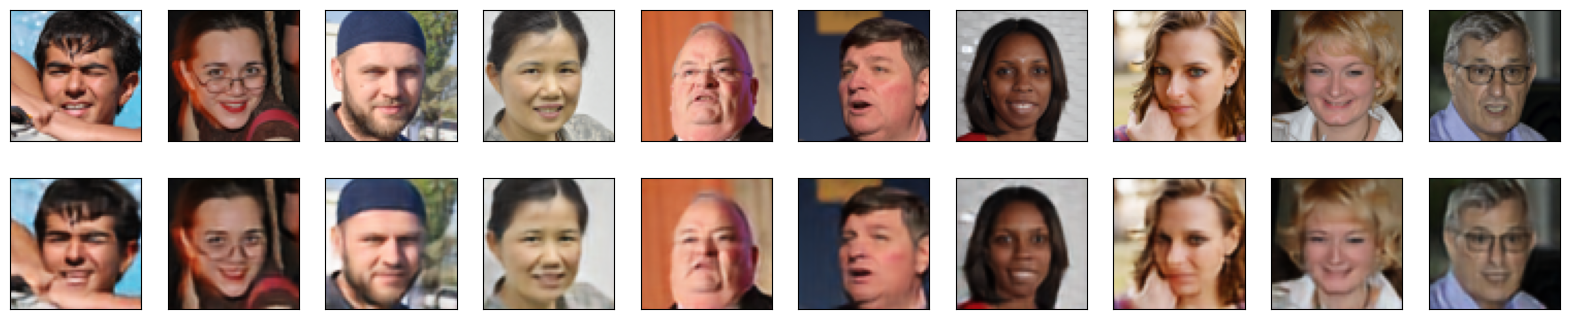

In [5]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X[i].reshape(t, t,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(t, t,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)